In [134]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [135]:
datas = data.drop_duplicates(subset=['Area', 'Year'], keep='last')
datas = datas[datas["Area"] == "Portugal"]
datas = datas[["Year", "yield_amound"]]
datas["Year"] = datas["Year"].astype("float")

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

Text(0.5, 1.0, 'Trend of the Time Series')

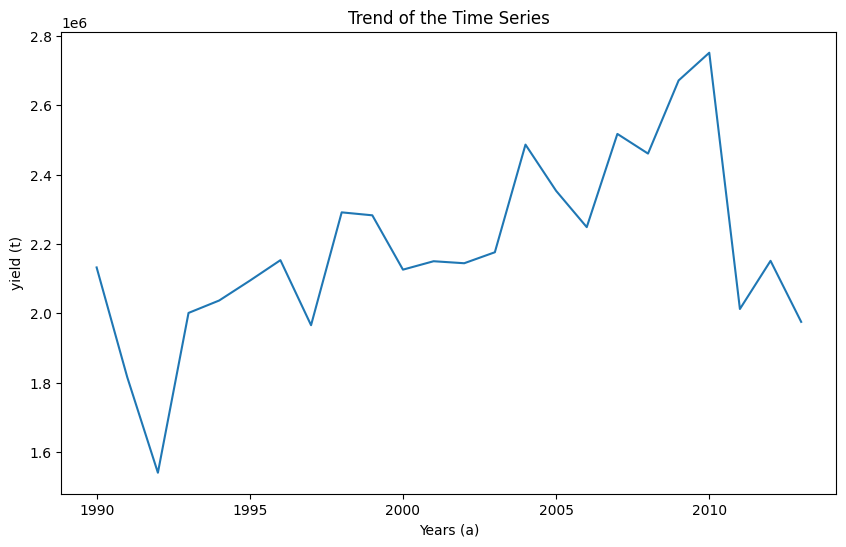

In [137]:
plt.figure(figsize= (10,6))
plt.plot(datas["Year"], datas["yield_amound"])
plt.xlabel('Years (a)')
plt.ylabel('yield (t)')
plt.title('Trend of the Time Series')

In [138]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

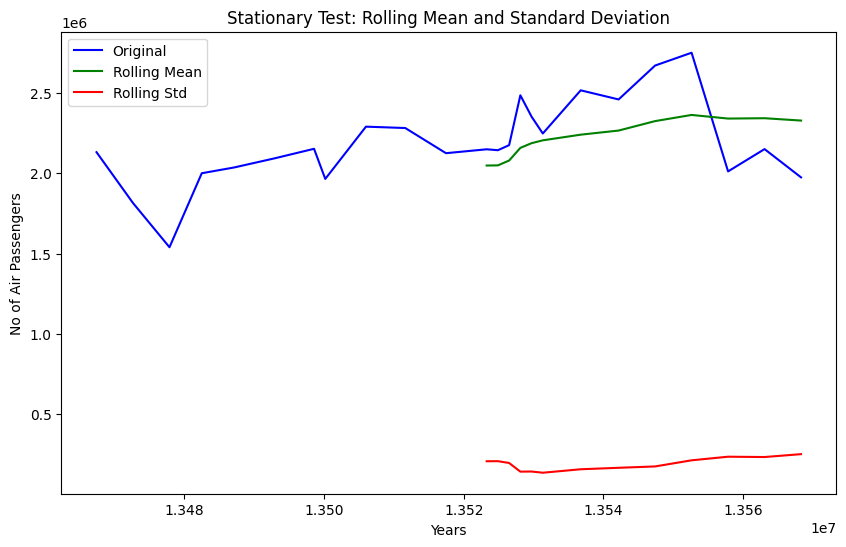

Results of Dickey-Fuller Test
Test Statistic                 -2.517007
p-value                         0.111391
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [139]:
stationarity_test(datas["yield_amound"])

--> not stationary, for better prediction we will transform

In [140]:
datas

,Year,yield_amound
13467407,1990.0,2131993.00
13472633,1991.0,1815295.17
13477859,1992.0,1539904.27
13482482,1993.0,2000773.99
13487105,1994.0,2036585.00
13492934,1995.0,2093742.42
13498562,1996.0,2152945.39
13500170,1997.0,1965391.12
13505999,1998.0,2290839.85
13511627,1999.0,2282327.49


In [141]:
datas["Year"] = datas["Year"].astype("int")
dataa = datas.groupby('Year')['yield_amound'].sum().reset_index()
dataa = dataa.set_index('Year')
dataa.index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='int32', name='Year')

In [142]:
dataa.index = pd.to_datetime(dataa.index, format='%Y').strftime('%Y/%m/%d')


In [143]:
dataa.index

Index(['1990/01/01', '1991/01/01', '1992/01/01', '1993/01/01', '1994/01/01',
       '1995/01/01', '1996/01/01', '1997/01/01', '1998/01/01', '1999/01/01',
       '2000/01/01', '2001/01/01', '2002/01/01', '2003/01/01', '2004/01/01',
       '2005/01/01', '2006/01/01', '2007/01/01', '2008/01/01', '2009/01/01',
       '2010/01/01', '2011/01/01', '2012/01/01', '2013/01/01'],
      dtype='object', name='Year')

In [144]:
#create new DataFrame:
dataa.index = pd.to_datetime(dataa.index)
#pd.to_datetime(df['Year'], format='%Y')

y = dataa['yield_amound'].resample("YS").mean()

In [145]:
y

Year
1990-01-01    2131993.00
1991-01-01    1815295.17
1992-01-01    1539904.27
1993-01-01    2000773.99
1994-01-01    2036585.00
1995-01-01    2093742.42
1996-01-01    2152945.39
1997-01-01    1965391.12
1998-01-01    2290839.85
1999-01-01    2282327.49
2000-01-01    2125611.88
2001-01-01    2149881.11
2002-01-01    2144097.44
2003-01-01    2175771.16
2004-01-01    2486228.23
2005-01-01    2352942.12
2006-01-01    2248211.83
2007-01-01    2517097.80
2008-01-01    2460357.24
2009-01-01    2671356.92
2010-01-01    2751268.07
2011-01-01    2012118.79
2012-01-01    2151068.44
2013-01-01    1974996.58
Freq: AS-JAN, Name: yield_amound, dtype: float64

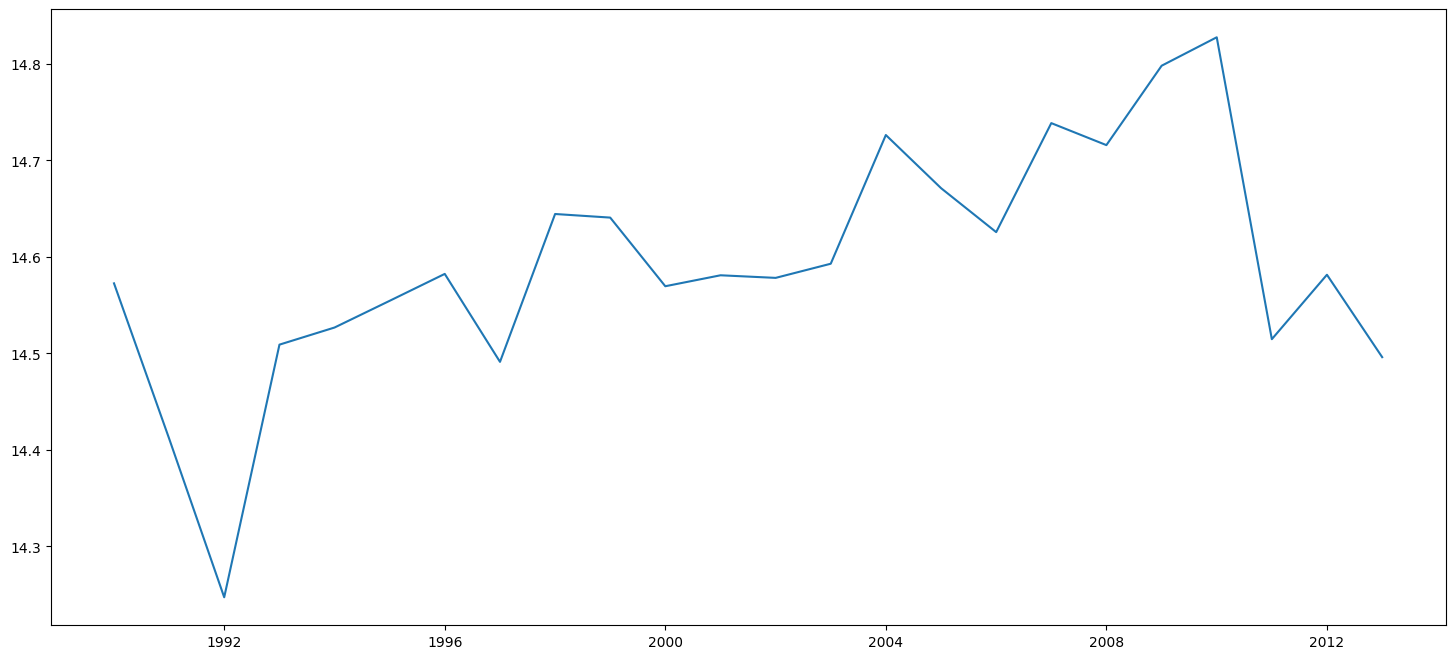

In [146]:
ts_log = np.log(y)
plt.plot(ts_log)

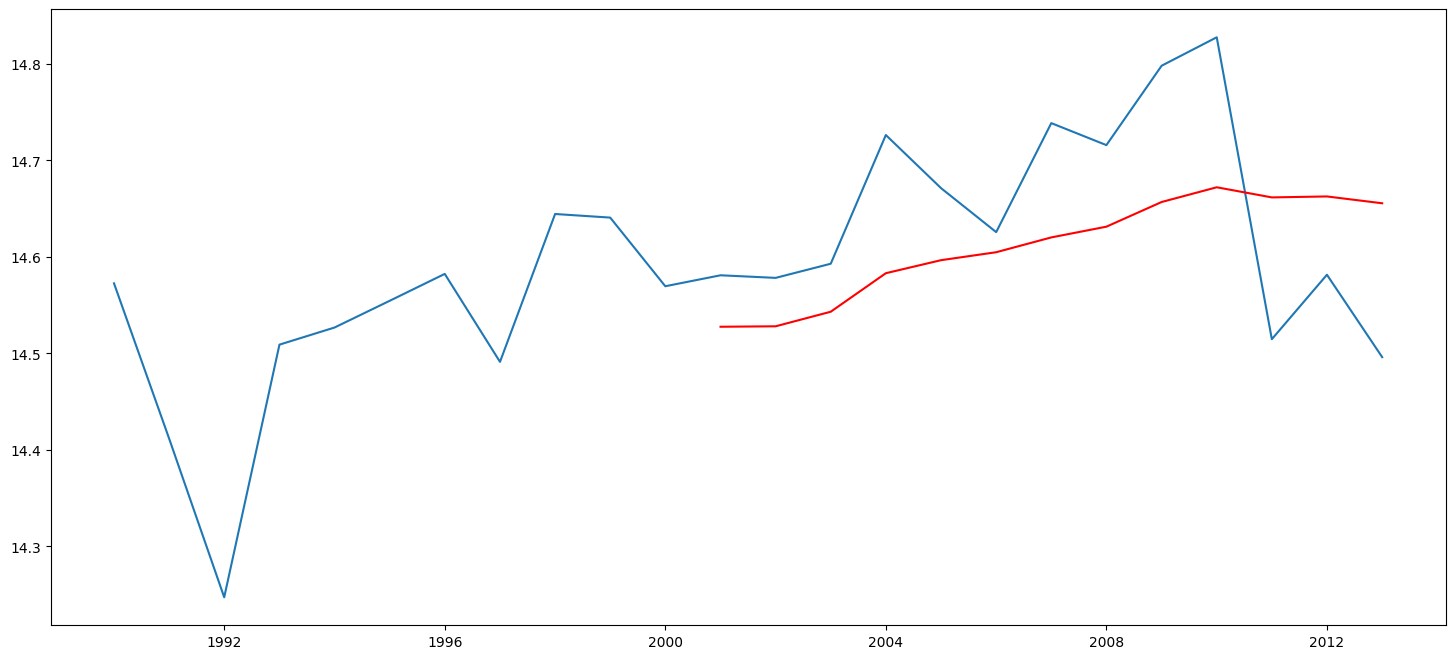

In [147]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

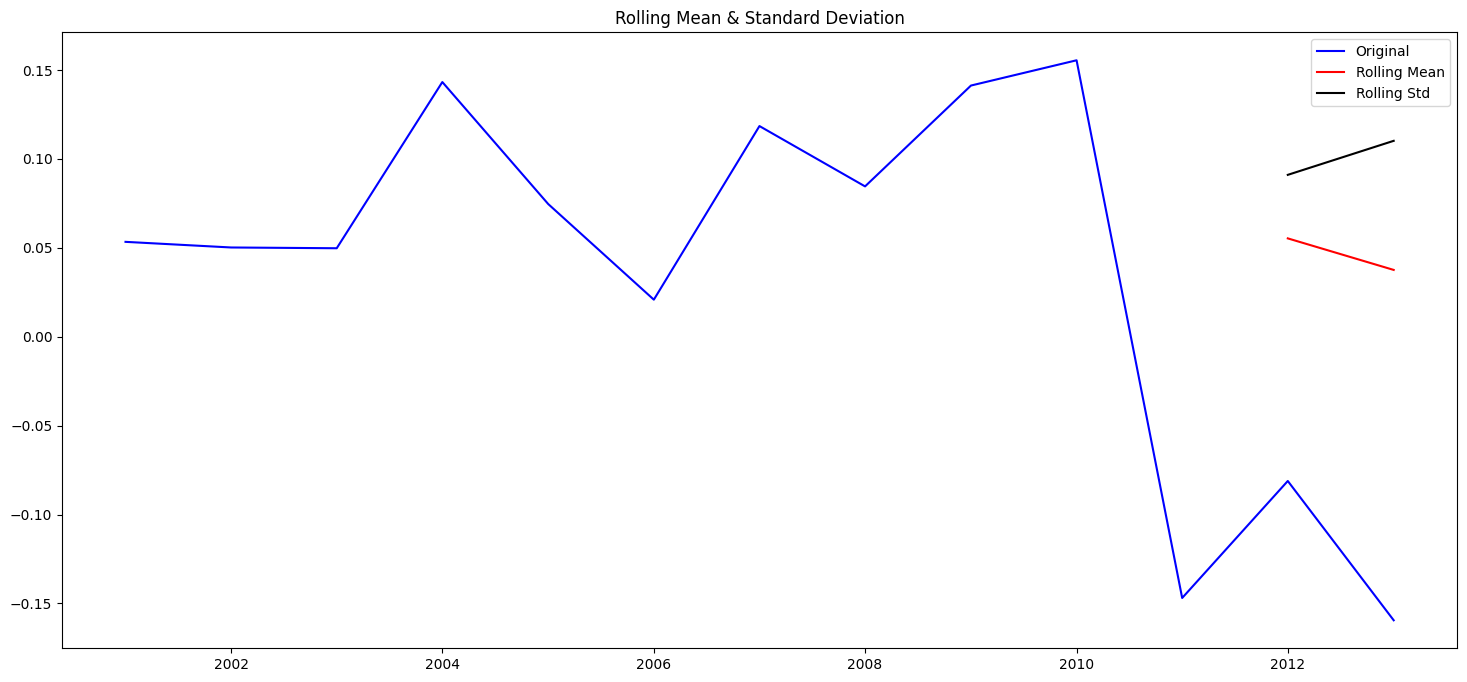

Results of Dickey-Fuller Test:
Test Statistic                 -1.373161
p-value                         0.595073
#Lags Used                      0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [148]:
ts_log_moving_avg_diff = ts_log - moving_avg
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

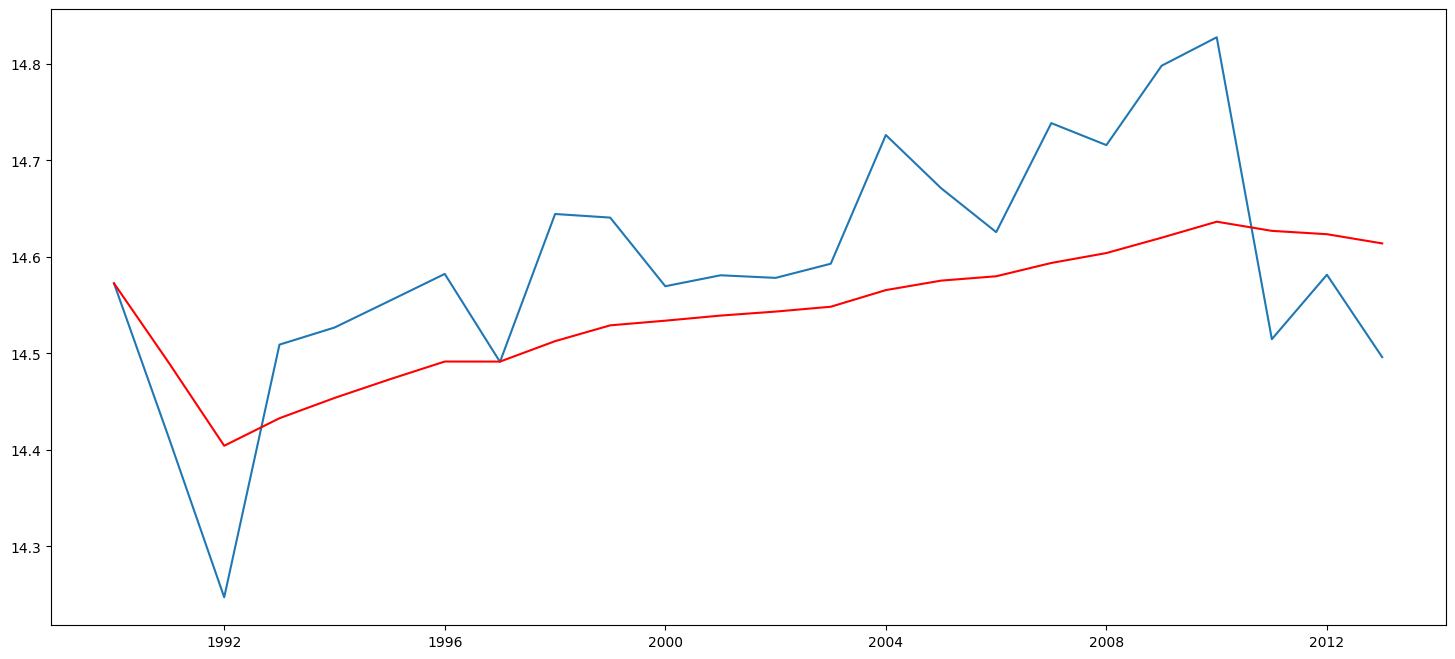

In [149]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

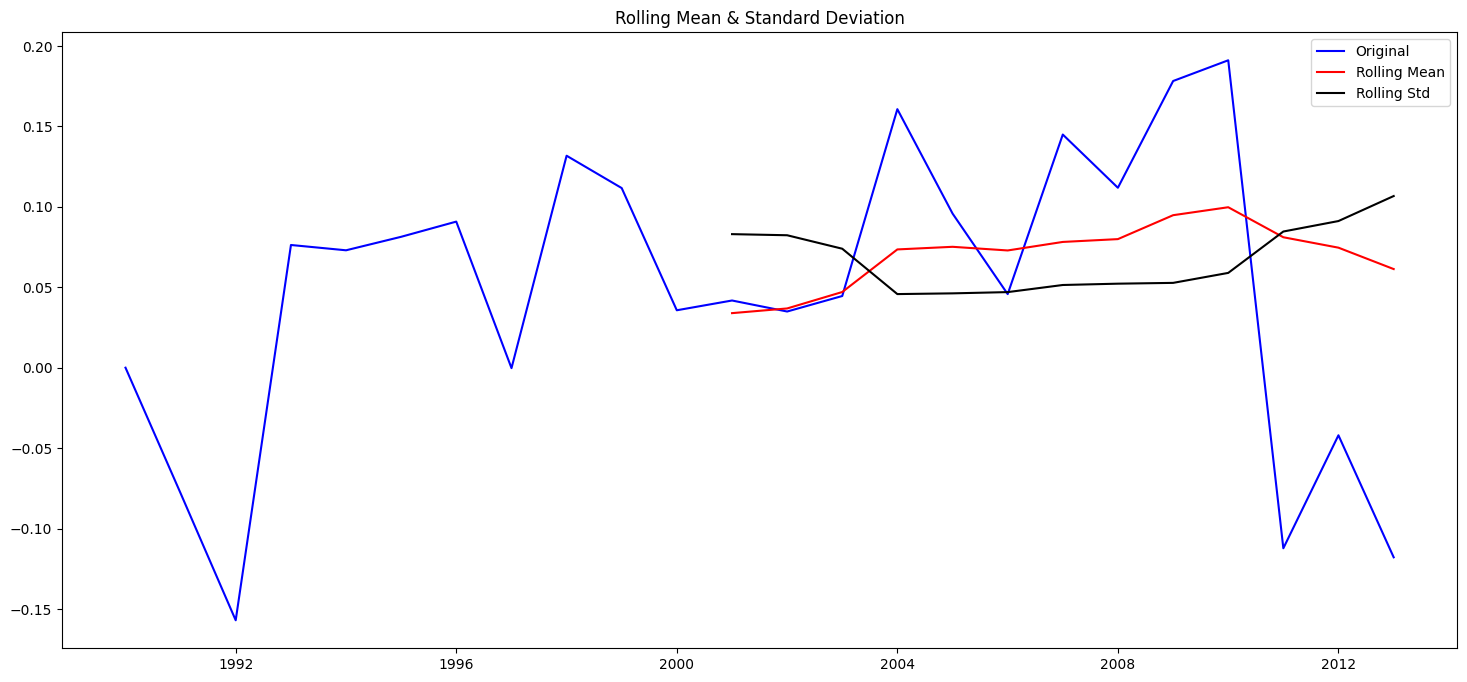

Results of Dickey-Fuller Test:
Test Statistic                 -2.397232
p-value                         0.142519
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [150]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

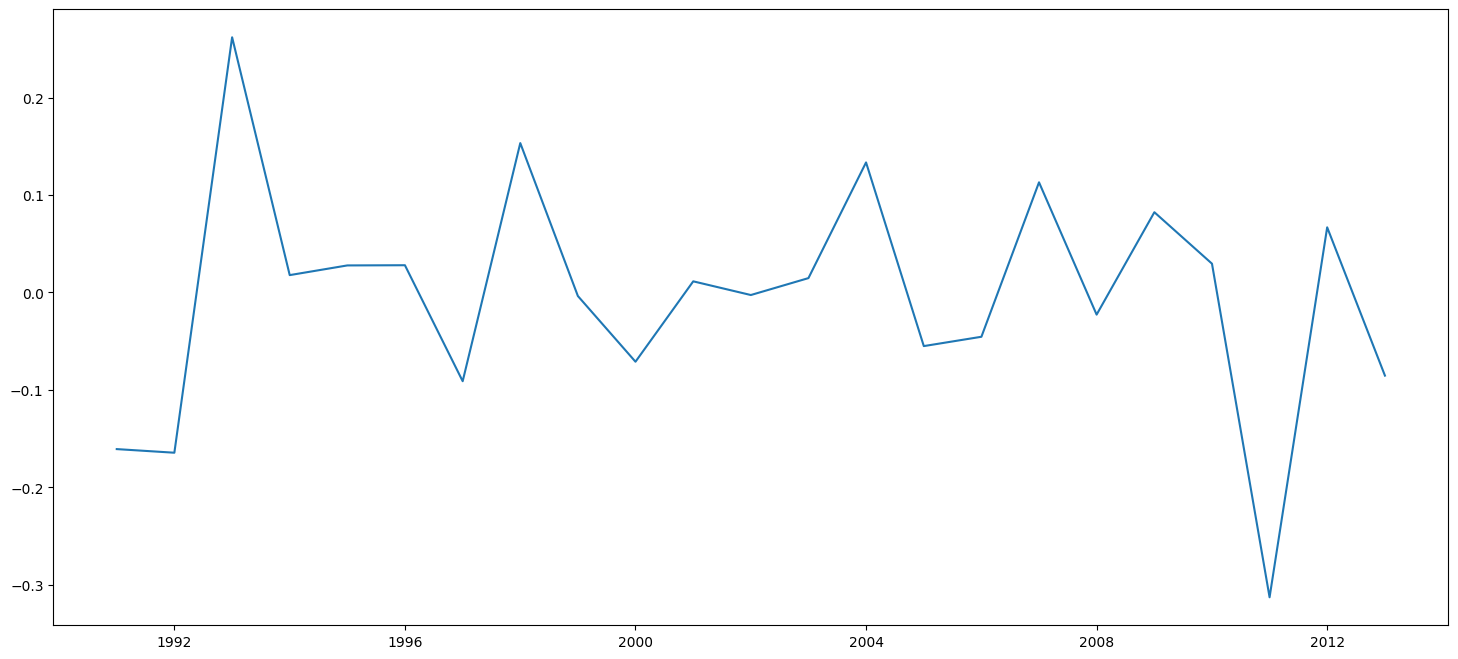

In [151]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

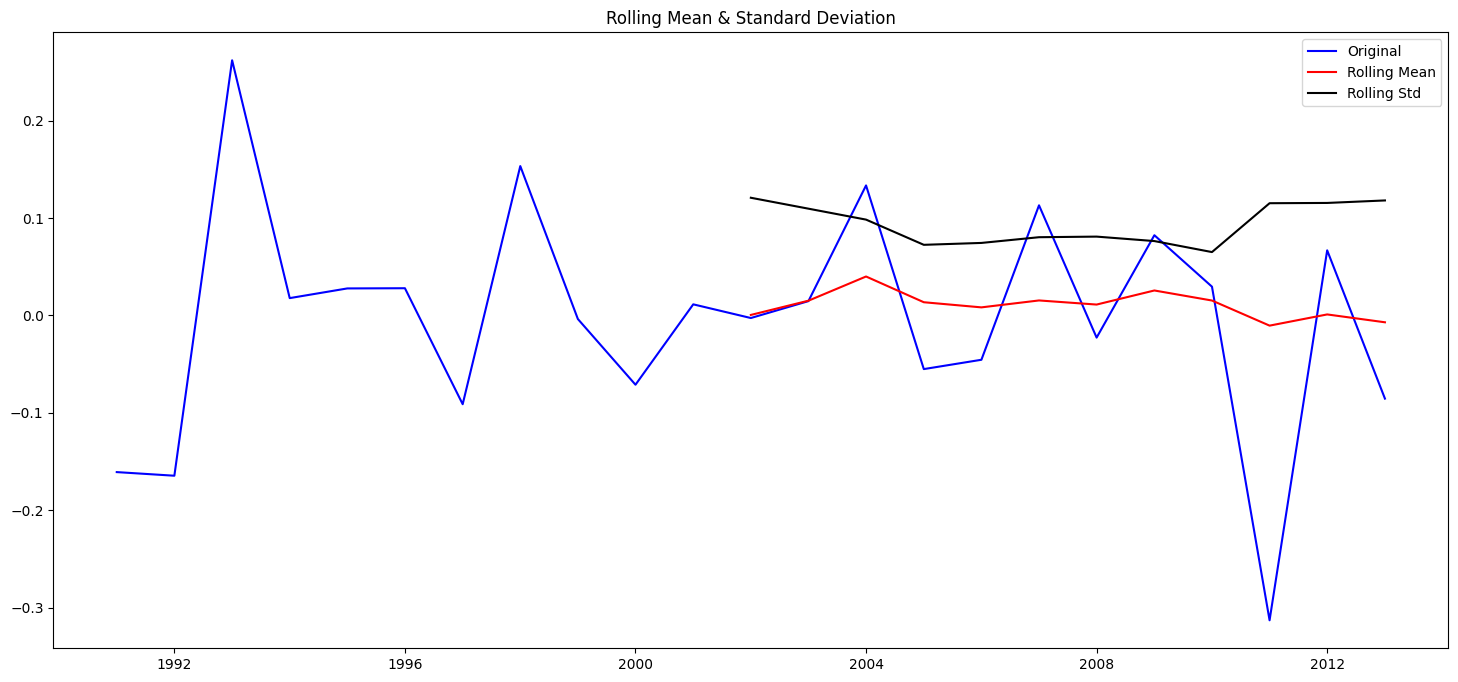

Results of Dickey-Fuller Test:
Test Statistic                  0.030699
p-value                         0.960998
#Lags Used                      8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [152]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

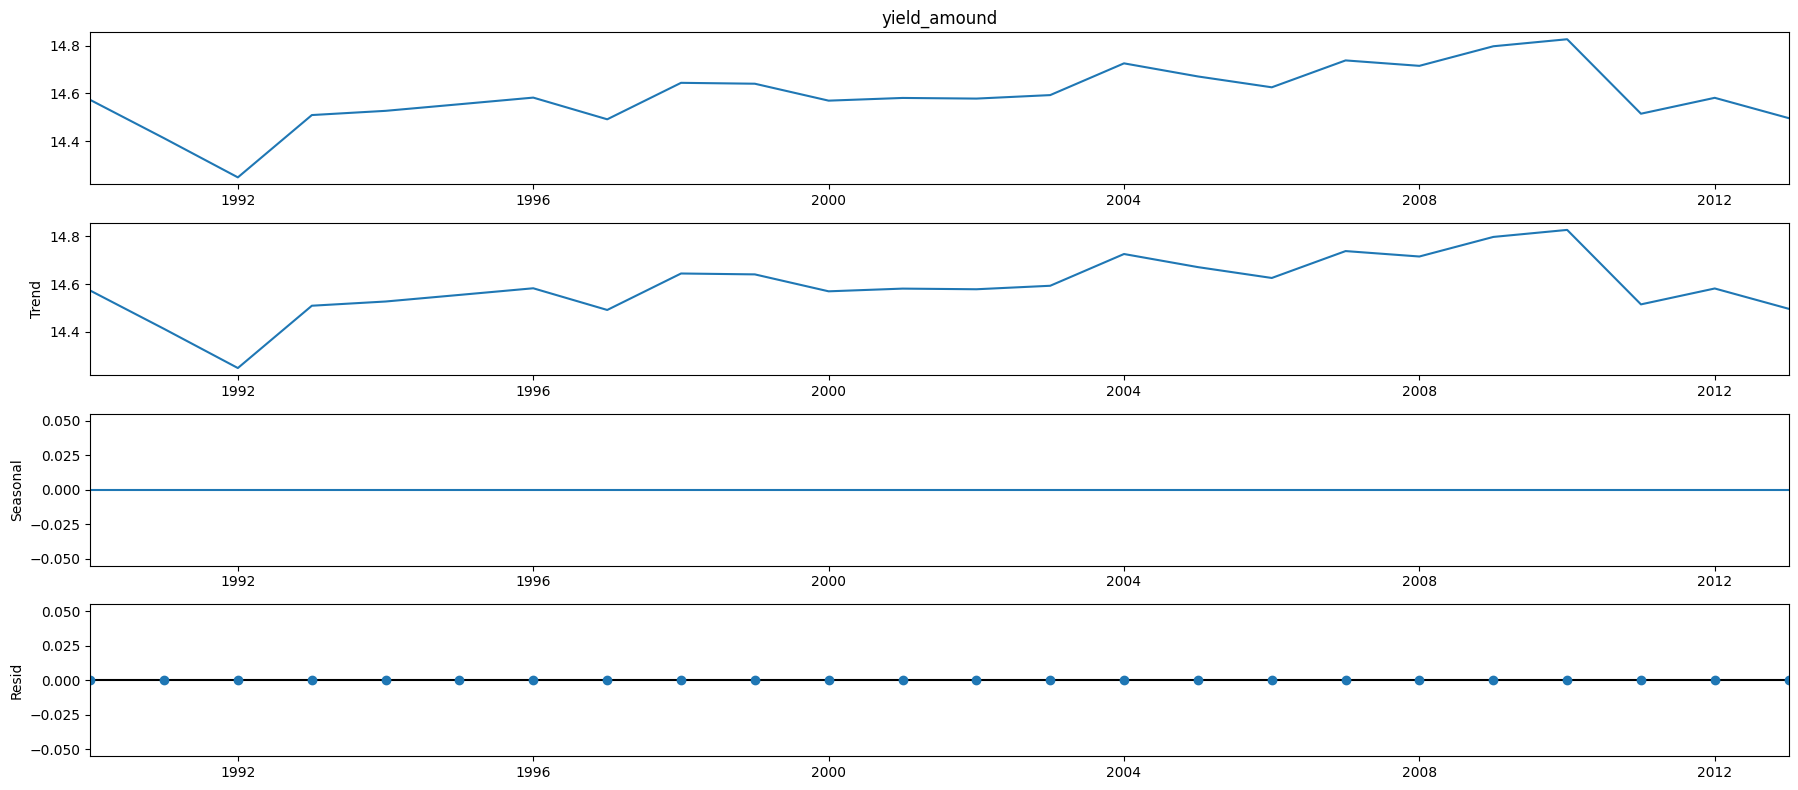

In [153]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

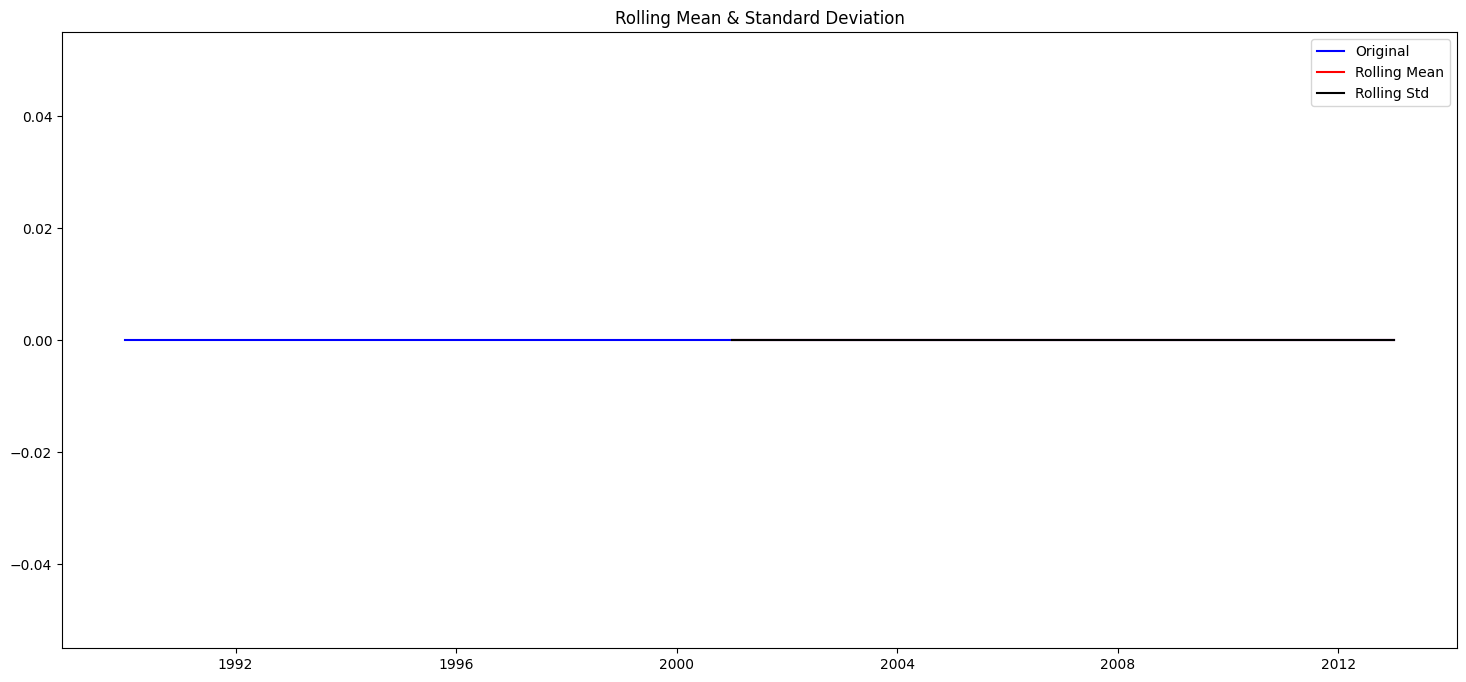

Results of Dickey-Fuller Test:
Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [155]:
train= y[:11]
test= y[11:]

In [156]:
test

Year
2001-01-01    2149881.11
2002-01-01    2144097.44
2003-01-01    2175771.16
2004-01-01    2486228.23
2005-01-01    2352942.12
2006-01-01    2248211.83
2007-01-01    2517097.80
2008-01-01    2460357.24
2009-01-01    2671356.92
2010-01-01    2751268.07
2011-01-01    2012118.79
2012-01-01    2151068.44
2013-01-01    1974996.58
Freq: AS-JAN, Name: yield_amound, dtype: float64

In [157]:
import pmdarima

from pmdarima import auto_arima

In [158]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=258.148, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=259.530, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=261.047, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=259.932, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.292 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [159]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=620.479, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=631.118, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=630.667, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=623.356, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=620.953, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=620.749, Time=0.07 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=622.343, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=624.023, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=622.537, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=622.205, Time=0.05 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 1.084 seconds


ARIMA(order=(2, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [160]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           yield_amound   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -136.748
Date:                Fri, 19 May 2023   AIC                            279.497
Time:                        14:56:41   BIC                            280.404
Sample:                    01-01-1990   HQIC                           278.501
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1209      0.269      0.450      0.653      -0.406       0.647
ma.L1         -0.3137      0.242     -1.295      0.195      -0.788       0.161
sigma2      2.609e+10   1.03e-11   2.54e+21      0.000    2.61e+10    2.61e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):               0.47   Skew:                             0.32
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.76e+36. Standard errors may be unstable.
"""

In [161]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2001-01-01    2.151101e+06
2002-01-01    2.154183e+06
2003-01-01    2.154556e+06
2004-01-01    2.154601e+06
2005-01-01    2.154607e+06
2006-01-01    2.154607e+06
2007-01-01    2.154607e+06
2008-01-01    2.154607e+06
2009-01-01    2.154607e+06
2010-01-01    2.154607e+06
2011-01-01    2.154607e+06
2012-01-01    2.154607e+06
2013-01-01    2.154607e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [162]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.085871


<Axes: xlabel='Year'>

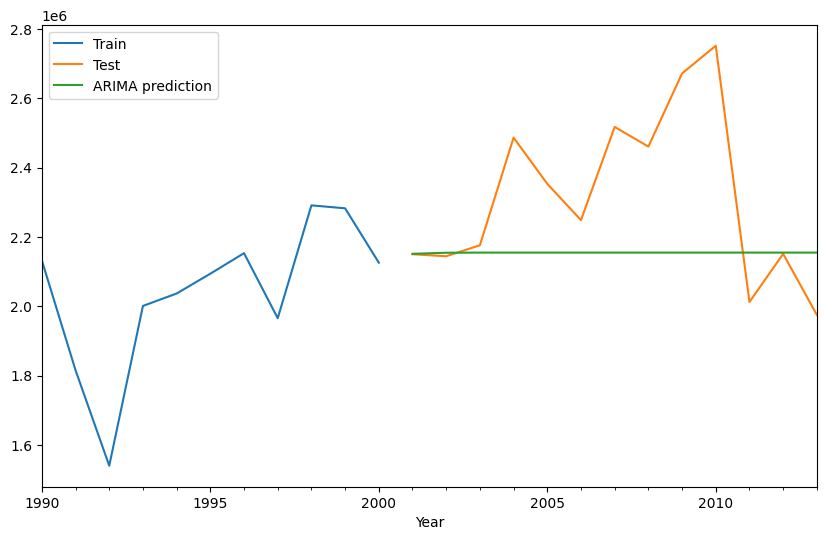

In [163]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

### Sarimax 

In [164]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       yield_amound   No. Observations:                   11
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 19 May 2023   AIC                             10.000
Time:                                    14:57:34   BIC                                nan
Sample:                                01-01-1990   HQIC                               nan
                                     - 01-01-2000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [165]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2001-01-01    2.125612e+06
2002-01-01    3.191609e+06
2003-01-01    2.874911e+06
2004-01-01    2.599520e+06
2005-01-01    3.060390e+06
2006-01-01    3.096201e+06
2007-01-01    3.153358e+06
2008-01-01    3.212561e+06
2009-01-01    3.025007e+06
2010-01-01    3.350456e+06
2011-01-01    3.341943e+06
2012-01-01    3.185228e+06
2013-01-01    3.185228e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<Axes: xlabel='Year'>

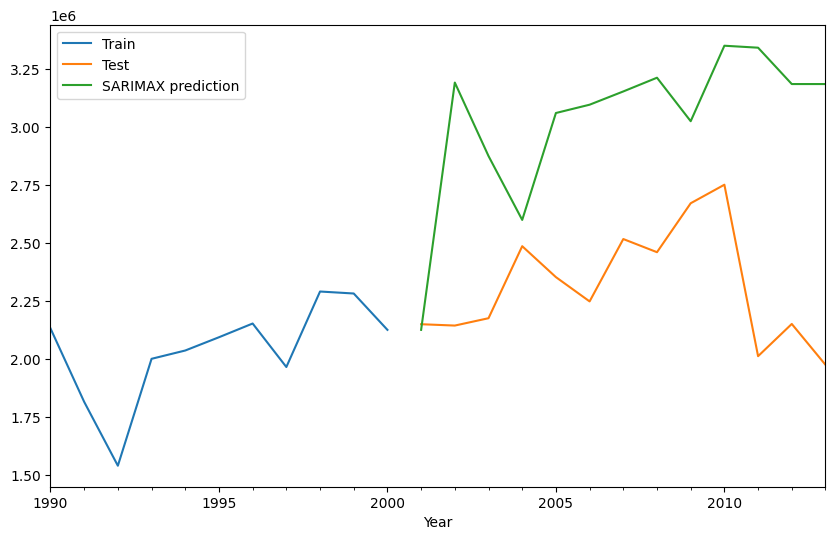

In [166]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [167]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2014-01-01    4.251225e+06
2015-01-01    3.934527e+06
2016-01-01    3.659136e+06
2017-01-01    4.120006e+06
2018-01-01    4.155817e+06
2019-01-01    4.212974e+06
2020-01-01    4.272177e+06
2021-01-01    4.084623e+06
2022-01-01    4.410072e+06
2023-01-01    4.401559e+06
2024-01-01    4.244844e+06
2025-01-01    4.244844e+06
2026-01-01    5.310841e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<Axes: xlabel='Year'>

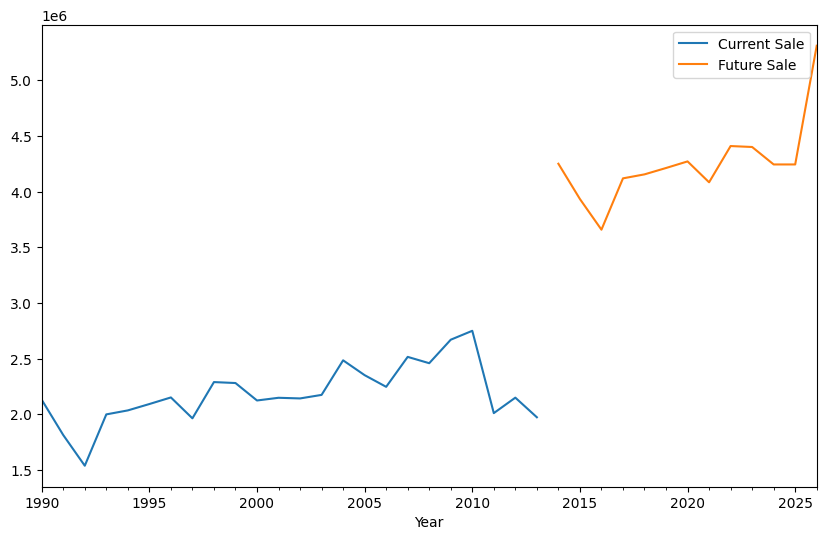

In [168]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')